In [1]:
from skimage import io, color, morphology
from skimage.color import rgb2gray

from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb
import os


In [2]:
BASEDIR = "data/"
FILENAME = "lego_4_small.png"
FILEPATH = os.path.join(BASEDIR, FILENAME)


In [3]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()
    
# UTILITY FUNCTIONS

    
def threshold_image(img_in, thres: int | float | list[float] | list[int], inverted : bool = False):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    
    if isinstance(thres, list):
        raise NotImplementedError("Not implemented for list")
    elif isinstance(thres, int) or isinstance(thres, float):
        img_out = np.zeros(img_in.shape)
        
        if inverted:
            img_out[img_in < thres] = 1
        else:
            img_out[img_in > thres] = 1
    
    return img_out

def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline
    

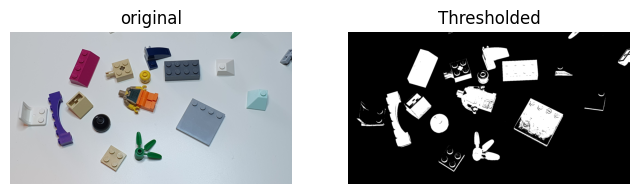

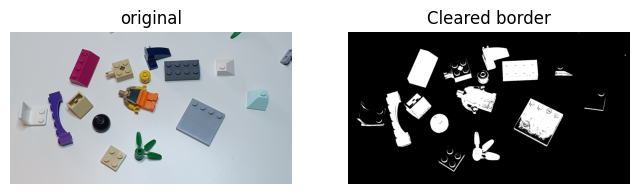

In [4]:
img = io.imread(FILEPATH)
img_grey = rgb2gray(img)
thresh = threshold_otsu(img_grey)
bin_img = threshold_image(img_grey, thresh, inverted = True)
plot_comparison(img, bin_img, "Thresholded")

bin_img_noborder = segmentation.clear_border(bin_img)
plot_comparison(img, bin_img_noborder, "Cleared border")

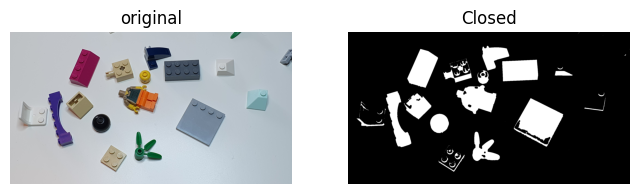

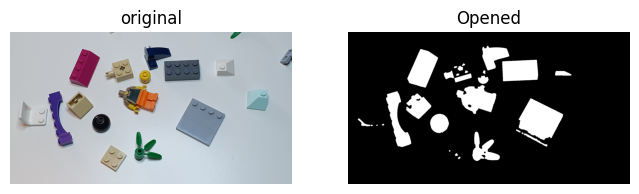

In [5]:
img_closed = morphology.closing(bin_img_noborder, morphology.disk(5))
img_open = morphology.opening(img_closed, morphology.disk(5))
plot_comparison(img, img_closed, "Closed")
plot_comparison(img, img_open, "Opened")



Number of labels: 29


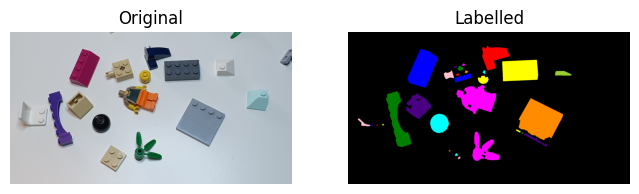

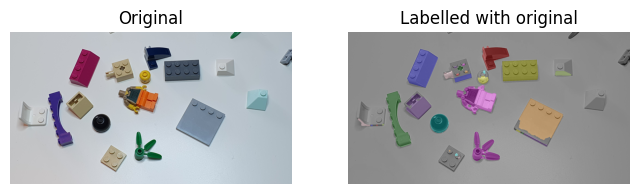

In [6]:
label_img = measure.label(img_open)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

label2rgb_img = label2rgb(label_img)
label2rgb_img_org = label2rgb(label_img, image=img)
show_comparison(img, label2rgb_img, "Labelled")
show_comparison(img, label2rgb_img_org, "Labelled with original")

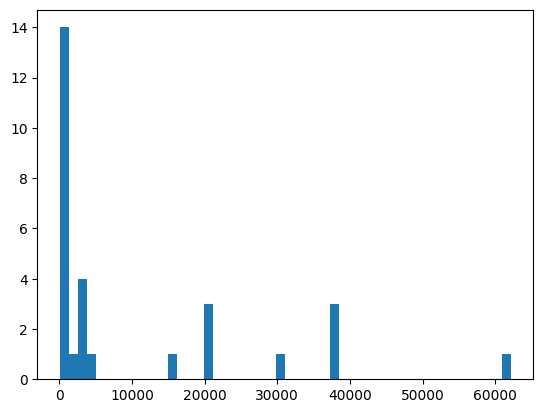

In [7]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()